In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
#from pyemma import msm

%matplotlib inline
#Script Pyeemma curl -s https://raw.githubusercontent.com/markovmodel/PyEMMA/devel/install_miniconda%2Bpyemma.sh | bash


#https://towardsdatascience.com/time-series-of-price-anomaly-detection-13586cd5ff46

#https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Time%20Series%20of%20Price%20Anomaly%20Detection%20Expedia.ipynb


In [3]:
expedia = pd.read_csv('/home/felipedev/Documentos/Docker/IOT/Data/Process Data/ProcessData.csv')

In [8]:
expedia.head()

,Date,Centro_de_Alto_Rendimiento,Puente_Aranda
0,01-01-2013 01:00,22.8,30.0
1,01-01-2013 02:00,40.8,52.8
2,01-01-2013 11:00,11.7,13.8
3,05-01-2013 05:00,26.2,47.0
4,11-02-2013 17:00,64.2,NaN


In [9]:
expedia.columns.values

array(['Date', 'Centro_de_Alto_Rendimiento', 'Puente_Aranda'],
      dtype=object)

In [10]:
expedia.shape

(61344, 3)

In [11]:
df = expedia

In [12]:
df.describe()

,Centro_de_Alto_Rendimiento,Puente_Aranda
count,54395.000000,58577.000000
mean,31.338838,48.869659
std,23.809909,31.302601
min,0.000000,0.000000
25%,13.000000,26.800000
50%,25.000000,41.700000
75%,43.800000,63.000000
max,343.000000,324.000000


In [97]:
df['Centro_de_Alto_Rendimiento'].describe()

count    54395.000000
mean        31.338838
std         23.809909
min          0.000000
25%         13.000000
50%         25.000000
75%         43.800000
max        343.000000
Name: Centro_de_Alto_Rendimiento, dtype: float64

In [98]:
df['Date'].describe()

count                61344
unique               61344
top       25-07-2018 06:00
freq                     1
Name: Date, dtype: object

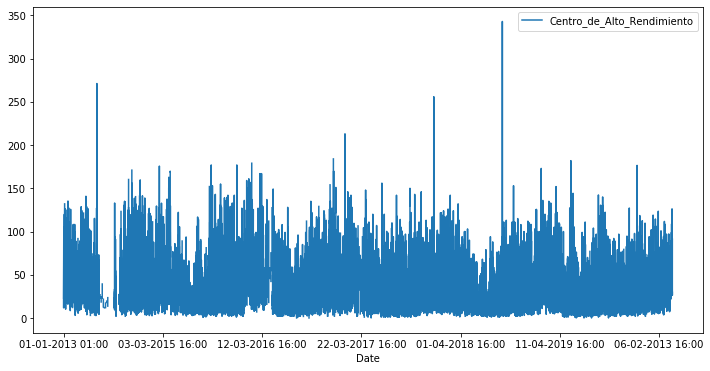

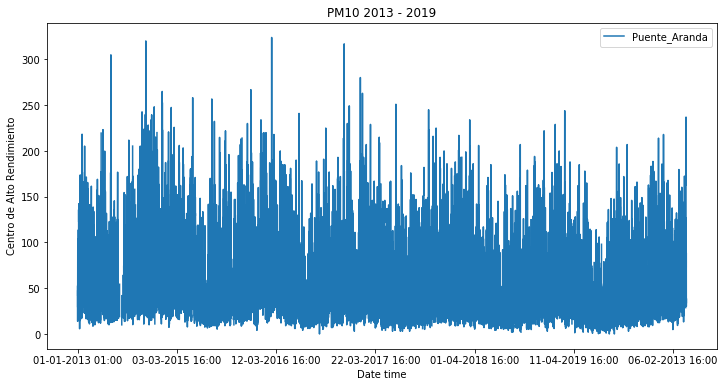

In [103]:
# plot the data
df.plot(x='Date', y='Centro_de_Alto_Rendimiento', figsize=(12,6))
df.plot(x='Date', y='Puente_Aranda', figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('Centro de Alto Rendimiento')
plt.title('PM10 2013 - 2019');



In [61]:
df.head()

,Date,Centro_de_Alto_Rendimiento,Puente_Aranda
0,01-01-2013 01:00,22.8,30.0
1,01-01-2013 02:00,40.8,52.8
2,01-01-2013 11:00,11.7,13.8
3,05-01-2013 05:00,26.2,47.0
4,11-02-2013 17:00,64.2,NaN


In [62]:
pd.isnull(df).values.ravel().sum()

9716

In [63]:
data2 = df

In [64]:
data2.head()

,Date,Centro_de_Alto_Rendimiento,Puente_Aranda
0,01-01-2013 01:00,22.8,30.0
1,01-01-2013 02:00,40.8,52.8
2,01-01-2013 11:00,11.7,13.8
3,05-01-2013 05:00,26.2,47.0
4,11-02-2013 17:00,64.2,NaN


In [65]:
data2.shape

(61344, 3)

In [66]:
#Rellena los NaN con el valor 0
data2 = data2.fillna(method="ffill")

In [67]:
pd.isnull(data2).values.ravel().sum()

0

In [69]:
data2.head(10)

,Date,Centro_de_Alto_Rendimiento,Puente_Aranda
0,01-01-2013 01:00,22.8,30.0
1,01-01-2013 02:00,40.8,52.8
2,01-01-2013 11:00,11.7,13.8
3,05-01-2013 05:00,26.2,47.0
4,11-02-2013 17:00,64.2,47.0
5,21-02-2014 17:00,23.7,42.3
6,21-02-2014 18:00,33.3,51.5
7,21-02-2014 19:00,63.3,66.0
8,21-02-2014 20:00,59.7,77.3
9,21-02-2014 21:00,79.8,83.7


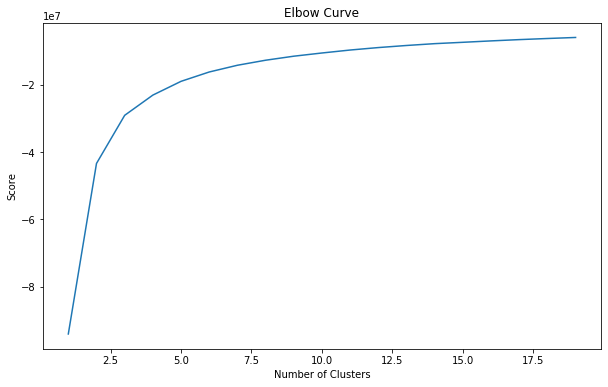

In [96]:

data = data2[['Centro_de_Alto_Rendimiento', 'Puente_Aranda']]

n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

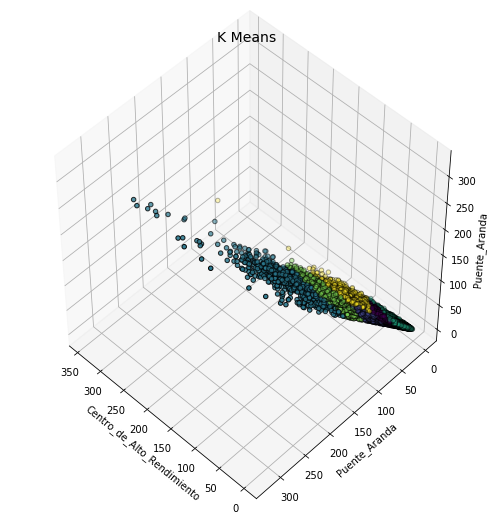

In [86]:
X = data2[['Centro_de_Alto_Rendimiento', 'Puente_Aranda', 'Puente_Aranda']]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=6)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("Centro_de_Alto_Rendimiento")
ax.set_ylabel("Puente_Aranda")
ax.set_zlabel("Puente_Aranda")
plt.title("K Means", fontsize=14);

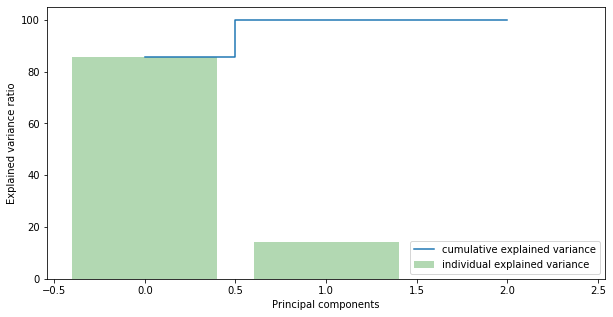

In [97]:
data = data2[['Centro_de_Alto_Rendimiento', 'Puente_Aranda', 'Puente_Aranda']]
X = data.values
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [98]:
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
#https://machinelearningmastery.com/start-here/#deep_learning_time_series

In [100]:
#https://www.mdpi.com/1424-8220/19/11/2451/htm#B9-sensors-19-02451
#https://www.mdpi.com/sensors/sensors-19-02451/article_deploy/html/images/sensors-19-02451-g006.png

In [101]:
#https://iopscience.iop.org/article/10.1088/1742-6596/803/1/012143/pdf
#https://arxiv.org/pdf/1812.00890.pdfgit